In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import pickle

In [9]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/c3/8b/af9e0984f5c0df06d3fab0bf396eb09cbf05f8452de4e9502b182f59c33b/matplotlib-3.1.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 71kB 1.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [2]:
!wget https://github.com/dating-success-app/Data-Science/raw/master/data_exploration/Data/profiles.csv.zip
!unzip profiles.csv.zip

--2019-07-31 22:29:45--  https://github.com/dating-success-app/Data-Science/raw/master/data_exploration/Data/profiles.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dating-success-app/Data-Science/master/data_exploration/Data/profiles.csv.zip [following]
--2019-07-31 22:29:45--  https://raw.githubusercontent.com/dating-success-app/Data-Science/master/data_exploration/Data/profiles.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56227692 (54M) [application/zip]
Saving to: ‘profiles.csv.zip’

profiles.csv.zip    100%[===================>]  53.62M  68.8MB/s    in 0.8s    

2019-07-31 22:29:46 (68.8 MB/s) - ‘profiles.csv

In [77]:
%cd ~
%cd Documents/Github/Data-Science/data_exploration

df = pd.read_csv('./Data/profiles.csv')

print(df.shape,'\n',
      df.columns,'\n')
df.head()

/Users/azel
/Users/azel/Documents/GitHub/Data-Science/data_exploration
(59946, 31) 
 Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object') 



,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [80]:
essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 
          'essay5', 'essay6','essay7', 'essay8', 'essay9']

df = df[essays].dropna().reset_index()

descriptions = []

for essay in essays:
     for i in np.arange(len(df)):
            descriptions.append([df[essay][i]])

In [81]:
len(descriptions)

298660

In [82]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [48]:
#desc = desc.apply(lambda x:tokenize(x)).values

In [95]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
ex_stop = ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 
           'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 
           'besid', 'br', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 
           'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 
           'henc', 'hereaft', 'herebi', 'howev', 'href', 'hundr', 'inde', 'mani', 
           'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 
           'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 
           'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 
           'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 
           'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 
           'wherev', 'whi', 'yourselv','anywh', 'el', 'elsewh', 'everywh', 'ind', 
           'otherwi', 'plea', 'somewh', 'ilink',"i'm", 'good','000','10','100','11',
           '12','13','14','15','16','17','1st','20','2011','2012','21','24','25','27s',
           '29','2c','30','3d','3rd','40','4th','50','500','64','70','80','80s','90',
           '90s','99','26','2a','2nd','09','0agames','1000','10k','18','2009','2010',
           '2am','2f','3am','3cbr','3e','45','4am','5th','6mo','75','85','00','6th',
           '70s','28','35','200','2000','_blank','22',]

stop_words = text.ENGLISH_STOP_WORDS.union(ex_stop).union(punc)
vectorizer = TfidfVectorizer(stop_words = stop_words, max_features=7000)
X = vectorizer.fit_transform(desc)
vectorizer.get_feature_names()

['abalone',
 'abandon',
 'abandoned',
 'abandoning',
 'abilities',
 'ability',
 'able',
 'ableton',
 'abroad',
 'abs',
 'absinthe',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstract',
 'abstraction',
 'absurd',
 'absurdity',
 'absurdly',
 'abundance',
 'abuse',
 'abusing',
 'academia',
 'academic',
 'academics',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessorizing',
 'accident',
 'accidentally',
 'accidents',
 'accommodating',
 'accompanied',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'according',
 'accordion',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounting',
 'accounts',
 'accumulating',
 'accuracy',
 'accurate',
 'accurately',
 'ace',
 'ache',
 'achieve',
 'achiever',
 'achieving',
 'acknowledging',
 'acoustic',
 'acquaintances',
 'acquired',
 'acquiring',
 'acrobatics',
 'acronyms',
 'act',
 'acting',
 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


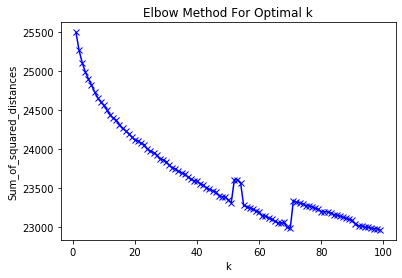

In [98]:
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,100)

for k in K:
    print(k)
    km = KMeans(n_clusters=k, n_jobs=-1, random_state = 42, verbose=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


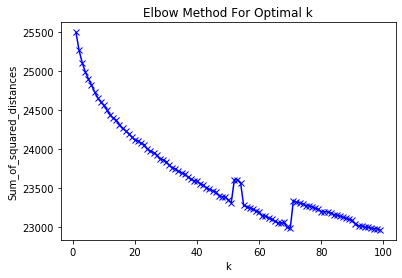

In [99]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [105]:
kmeans = KMeans(n_clusters = 30, n_jobs = -1, verbose=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=10)

In [106]:
words = vectorizer.get_feature_names()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : stuff, things, making, fixing, cooking, like, computer, figuring, people, lot
1 : cooking, listening, making, dancing, writing, eating, getting, life, people, things
2 : reading, people, writing, cooking, listening, making, maps, things, talking, dancing
3 : solving, problem, problems, listening, things, people, cooking, making, creative, finding
4 : like, think, know, people, don, pretty, things, really, just, making
5 : laughing, listening, cooking, jokes, smiling, dancing, eating, learning, talking, making
6 : really, people, things, know, making, pretty, don, just, like, cooking
7 : laugh, making, people, cooking, smile, listening, really, time, think, friends
8 : time, having, people, making, wasting, things, cooking, getting, listening, spending
9 : games, video, board, playing, word, making, things, card, cooking, people
10 : interests, class, cooking, dancing, making, people, things, photography, drawing, writing
11 : parking, parallel, making, listening, finding, getting, 

In [107]:
kmeans.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.94210036e-04, 0.00000000e+00],
       [1.75928032e-04, 2.35811057e-04, 3.59726463e-05, ...,
        1.84830541e-04, 1.93712041e-04, 1.00761044e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [108]:
new_string = ['make, realli, friend, time, like, play, danc, know, love, life']
Y = vectorizer.transform(new_string)
x = kmeans.predict(Y)[0]

In [109]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(kmeans.cluster_centers_[x].reshape(1,-1), Y.toarray().reshape(1,-1)) 

array([[0.37876355]])

In [110]:
%cd
%cd Documents/Github/Data-Science/web_app

import dill
import pickle

pickle.dump(kmeans, open('means.sav', 'wb'))
pickle.dump(vectorizer, open('vect.sav', 'wb'))

/Users/azel
/Users/azel/Documents/GitHub/Data-Science/web_app
